In [1]:
#pip install colour

In [2]:
# Imports
from __future__ import division
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy, pylab
import seaborn as sns
import re
import glob
import time
import datetime
#sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [3]:
#!python --version

In [4]:
sns.__version__

'0.12.2'

In [5]:
#!pwd

In [6]:
def make_Ramp( ramp_colors ): 
    from colour import Color
    from matplotlib.colors import LinearSegmentedColormap

    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

#custom_ramp = make_Ramp( ['#0000ff','#00ffff','#ffff00','#ff0000' ] ) 
#custom_ramp = make_Ramp( ['#32369c','#00ff00','#ffff00','#ff0000' ] ) 
#custom_ramp = make_Ramp( ['#00f3ff','#68ff00','#ffbf00','#ff005c' ] ) 
#custom_ramp = make_Ramp( ['#00188f','#00bcf2','#00b294','#009e49','#bad80a', '#fff100', '#ff8c00','#e81123','#ec008c', '#68217a' ] ) 
custom_ramp = make_Ramp( ['#00188f','#00bcf2','#00b294','#009e49','#bad80a', '#fff100', '#ff8c00','#e81123','#ec008c' ] ) 



# single run

/mnt/rna/home/nkumarachchi2019/dev_1d_ABGEZ_benckmark_systems/ABGEZ_newv1v3chi_betacomb4/monomers/C/combine/P_vs_chi.dat
['', 'mnt', 'rna', 'home', 'nkumarachchi2019', 'dev', '1d', 'ABGEZ', 'benckmark', 'systems', 'ABGEZ', 'newv1v3chi', 'betacomb4', 'monomers', 'C', 'combine', 'P', 'vs', 'chi', 'dat']
P chi C
1
1.138355


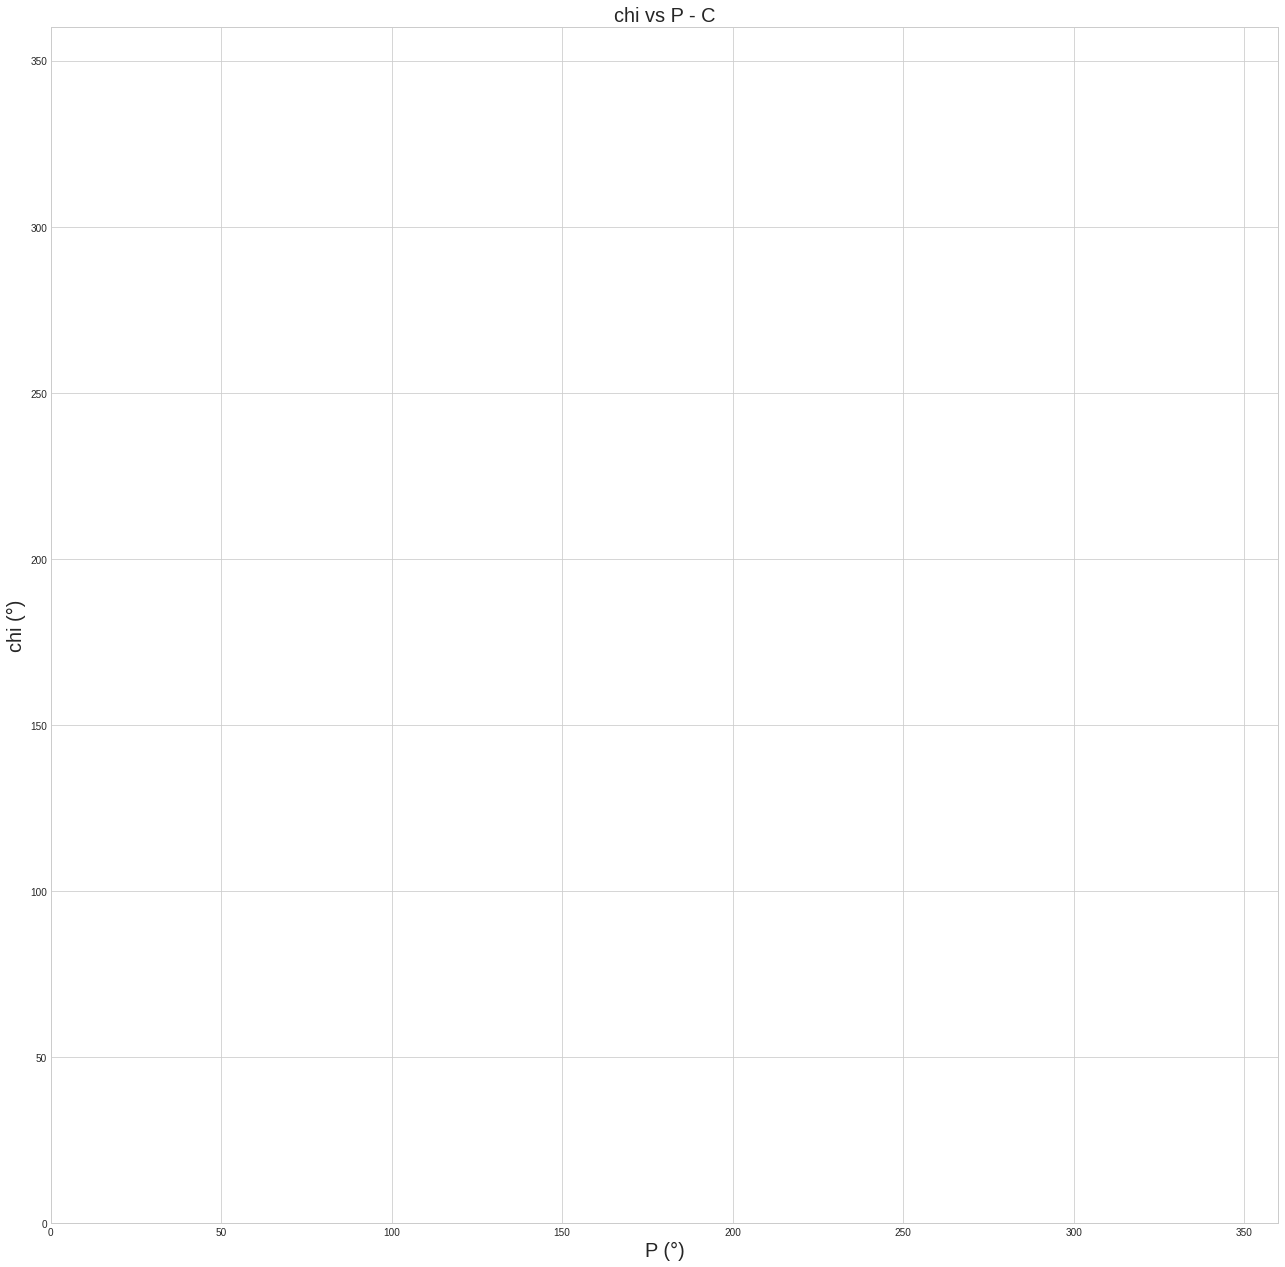

In [10]:
import datetime
import glob
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

t_start = datetime.datetime.now()
sdegree = ' (°)'

counter = 0
for filepath in glob.iglob('/mnt/rna/home/nkumarachchi2019/dev_1d_ABGEZ_benckmark_systems/ABGEZ_newv1v3chi_betacomb4/monomers/A/combine/P_vs_chi.dat'):
    print(filepath)
    df = pd.read_csv(filepath, delim_whitespace=True)

    a = re.split(';|\.|/| |,|_|\t+| +|\*|\n', filepath)
    print(a)
    xname = a[16]
    yname = a[18]
    dimername = a[14]
    print(xname, yname, dimername)

    plt.style.use("seaborn-whitegrid")
    plt.figure(figsize=(5,5))

    ax = sns.kdeplot(data=df, x='P_value', y='chi_value', fill=False, thresh=0, levels=20, cmap=custom_ramp, common_norm=True, cbar=True, cbar_kws={'format': '%2.1e', 'label': 'kernel density'})

    plt.title(f"{yname} vs {xname} - {dimername}", size=20)
    plt.xlabel(xname +str(sdegree), fontsize=20)
    plt.ylabel(yname +str(sdegree), fontsize=20)
    plt.xlim([0, 360])
    plt.ylim([0, 360])
    ax.set_yticks(np.arange(0, 361, 30))
    ax.set_xticks(np.arange(0, 361, 30))
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(3)

    plt.savefig(f'/mnt/rna/home/nkumarachchi2019/dev_1d_ABGEZ_benckmark_systems/ABGEZ_newv1v3chi_betacomb4/monomers/A/combine/'+str(xname)+'_'+str(yname)+'_'+str(dimername), bbox_inches='tight', dpi=300)

    counter += 1
    print(counter)

t_end = datetime.datetime.now()
elapsedTime = (t_end - t_start)

print(elapsedTime.total_seconds())

# with subplots no need here

#change cell type to code cell > cell type > code

t_start = datetime.datetime.now()


dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]

counter=0
for filepath in glob.iglob('/mnt/rna/home/nkumarachchi2019/scratch/project_dimer_extraction/2dplots_2d_data/zeta/2d_*.dat'):
#for filepath in glob.iglob('/mnt/rna/home/nkumarachchi2019/scratch/project_dimer_extraction/2dplots_2d_data/XXXXX/x2d_*'):
#/
  
  print(filepath)
  df= pd.read_csv(filepath, header = None, delim_whitespace=True,)

  a=re.split(';|\.|/| |,|_|\t+| +|\*|\n',filepath)
  print(a)
  xname=a[15]
  yname=a[16] 
  dimername=a[17]
  print(xname,yname,dimername)

  plt.style.use("seaborn-whitegrid")
  plt.figure(figsize=(22,12))

  for i in range(0,6):
  #/ 
    plt.subplot(2,3,i+1)
    ax = sns.kdeplot(data=df, x=df.loc[df[2] == dimtypes[i], 0], y=df.loc[df[2] == dimtypes[i], 1], fill=False, thresh=0, levels=20, cmap=custom_ramp, common_norm=True, cbar=True, cbar_kws={'format': '%2.1e', 'label': 'kernel density'} )
    plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)
    plt.xlabel(str(xname), fontsize=12)
    plt.ylabel(str(yname), fontsize=12)
    plt.xlim([0, 360])
    plt.ylim([0, 360])
    ax.set_yticks(np.arange(0,361,30))
    ax.set_xticks(np.arange(0,361,30))
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('3')  
    #plt.setp(ax, xlim=(0, 360), ylim=(0, 360))
  #/
  plt.suptitle(str(yname)+' vs '+str(xname)+' - '+str(dimername), size=32)

  plt.savefig('/mnt/rna/home/nkumarachchi2019/scratch/project_dimer_extraction/2dplots_2d_data/plots/zeta/'+str(xname)+'_'+str(yname)+'_'+str(dimername), bbox_inches='tight', dpi=300 )
    
  counter+=1
  print(counter)

#/



t_end = datetime.datetime.now()
elapsedTime = (t_end - t_start )

print(elapsedTime.total_seconds())